In [17]:
import concurrent.futures as cf
from scipy.optimize import curve_fit
from functions import sigmoid, variables, variables2, lin_reg, function_A, function_B
import matplotlib.pyplot as plt
%matplotlib inline

# Multithreading and Multiprocessing
As you saw during the lecture, using Multithreading and Multiprocessing is how we can parallelize our codes. Today we will work with
```concurrent.futures```, which is a Python module that allows us to work asynchronously with either separate processes or threads.

## Function A

The function A will calculate the Wallis product for $\pi$: 

$$\frac{\pi}{2} = \prod_{n=1}^{\infty} (\frac{2n}{2n-1}\cdot \frac{2n}{2n+1}) $$

In [18]:
# Data to pass through the function A
nums = [1822725,
        22059421,
        32374695,
        88754320,
        9716266]

# We can leave the default value for workers:
workers = None

1. To Do: use Multithreading and Multiprocessing from ```concurrent.futures``` . Compare the results for `function_a()` using the magic command ```%%time```.

In [19]:
# Multithreading
#TODO
# Hint 1: It shouldn't be longer than three lines including %%time.
# Hint 2: Use the call "map(func, *iterables)"

In [20]:
# Multiprocessing
#TODO
# Hint 1: It shouldn't be longer than three lines including %%time.
# Hint 2: Use the call "map(func, *iterables)"

2. To Do: Which execution was faster? Why?

Answer: 

Solution:

In [21]:
%%time
with cf.ProcessPoolExecutor(max_workers=workers) as e:
    res = e.map(function_A, nums)

Wall time: 26.5 s


In [22]:
%%time
with cf.ThreadPoolExecutor(max_workers=workers) as e:
    res = e.map(function_A, nums)

Wall time: 30.6 s


2. To Do: Which execution was faster? Why?

Answer: Multiprocessing, because it is a heavy CPU task.

## Function B

In [23]:
# Data to pass through the function B

urls = ['http://www.google.com/',
        'http://www.facebook.com/',
        'http://www.yahoo.com/',
        'https://www.amazon.com',
        'https://www.ebay.com',
        'https://www.stackoverflow.com',
        'https://www.cnn.com',
        'http://www.bbc.co.uk',
        'https://www.twitch.tv', 
        'https://www.rottentomatoes.com/',
        'https://www.imdb.com/',
        'https://www.netflix.com/',
        'https://www.instagram.com/',
        'https://www.uber.com/']

workers = None

3. To Do:  use Multithreading and Multiprocessing from ```concurrent.futures``` and compare the results for `function_b()` using the magic command ```%%time```.

In [24]:
# TODO 
# Multithreading

In [25]:
# TODO 
# Multiprocessing

4. To Do: Which exectution was faster? Why?

Answer:

Solution:

In [26]:
%%time 
# Multithreading
with cf.ThreadPoolExecutor(max_workers = workers) as e:
    # Start the load operations and mark each future with its URL
    future_to_url = {e.submit(function_B, url): url for url in urls}
    for future in cf.as_completed(future_to_url):
        url = future_to_url[future]
        try:
            data = future.result()
        except Exception as exc:
            print('%r generated an exception: %s' % (url, exc))
        else:
            print('%r page is %d bytes' % (url, len(data.text)))

'http://www.google.com/' page is 14007 bytes
'https://www.amazon.com' page is 6591 bytes
'https://www.twitch.tv' page is 113514 bytes
'https://www.ebay.com' page is 429928 bytes
'https://www.rottentomatoes.com/' page is 390218 bytes
'https://www.netflix.com/' generated an exception: HTTPSConnectionPool(host='www.netflix.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025916FABA88>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
'https://www.uber.com/' page is 14 bytes
'http://www.bbc.co.uk' page is 366853 bytes
'http://www.facebook.com/' page is 87665 bytes
'https://www.cnn.com' page is 1120658 bytes
'https://www.instagram.com/' page is 70321 bytes
'https://www.stackoverflow.com' page is 180472 bytes
'http://www.yahoo.com/' page is 621500 bytes
'https://www.imdb.com/' page is 659735 bytes
Wall time: 13 s


In [27]:
%%time
# Multiprocessing
with cf.ProcessPoolExecutor(max_workers = workers) as e:
    # Start the load operations and mark each future with its URL
    future_to_url = {e.submit(function_B, url): url for url in urls}
    for future in cf.as_completed(future_to_url):
        url = future_to_url[future]
        try:
            data = future.result()
        except Exception as exc:
            print('%r generated an exception: %s' % (url, exc))
        else:
            print('%r page is %d bytes' % (url, len(data.text)))

'http://www.google.com/' page is 14040 bytes
'https://www.amazon.com' page is 2671 bytes
'http://www.facebook.com/' page is 87661 bytes
'http://www.yahoo.com/' page is 621454 bytes
'https://www.ebay.com' page is 431588 bytes
'https://www.cnn.com' page is 1120658 bytes
'http://www.bbc.co.uk' page is 366853 bytes
'https://www.twitch.tv' page is 113514 bytes
'https://www.stackoverflow.com' page is 180472 bytes
'https://www.rottentomatoes.com/' page is 390218 bytes
'https://www.uber.com/' page is 14 bytes
'https://www.instagram.com/' page is 70283 bytes
'https://www.imdb.com/' page is 659984 bytes
'https://www.netflix.com/' page is 429314 bytes
Wall time: 5.28 s


4. To Do: Which exectution was faster? Why?

Answer: Multithreading. URL requests can be parallelized.

## Using Multiprocessing and Multithreading with curve_fit

In [28]:
x,y,yn = variables() # creating the variables using the function "variables()" from "functions.py"

Wall time: 2.57 s


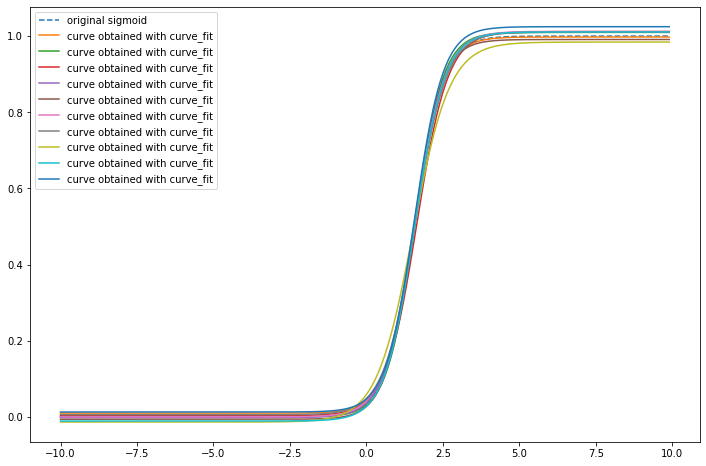

In [29]:
%%time
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(x, y, '--', label = 'original sigmoid')

with cf.ProcessPoolExecutor(max_workers=workers) as e:
    future_to_url = {e.submit(curve_fit, *[sigmoid,  x, yi]): yi for yi in yn}
    for future in cf.as_completed(future_to_url):
        yi = future_to_url[future]
        try:
            data = future.result()[0]  # Why [0]? This way we save only popt on 'values'
        except Exception as exc:
            print('Exception generated: %s' % (exc))
        else:
            y_fit = sigmoid(x, *data)
            plt.plot(x, y_fit, label = 'curve obtained with curve_fit')
plt.legend()

5. To Do: Repeat the process for Multithreading

In [30]:
# TODO

Solution:

Wall time: 61.8 ms


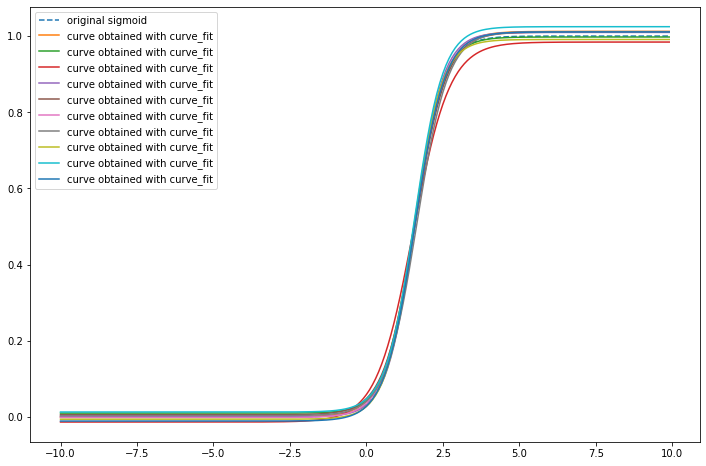

In [31]:
%%time
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(x, y, '--', label = 'original sigmoid')

with cf.ThreadPoolExecutor(max_workers=workers) as e:
    future_to_url = {e.submit(curve_fit, *[sigmoid,  x, yi]): yi for yi in yn}
    for future in cf.as_completed(future_to_url):
        yi = future_to_url[future]
        try:
            data = future.result()[0]
        except Exception as exc:
            print('Exception generated: %s' % (exc))
        else:
            y_fit = sigmoid(x, *data)
            plt.plot(x, y_fit, label = 'curve obtained with curve_fit')
plt.legend()

6. To Do: Which one was faster and why? 

Answer:

Solution:

6. To Do: Which one was faster and why? 

Answer: Multithreading

## Using Multiprocessing and Multithreading with LinearRegression

In [32]:
x2,y2,yn2 = variables2() # creating the variables using the function "variables2()" from "functions.py"

7. To Do: Use Multithreading and Multiprocessing for `lin_reg()` and plot the results (see ``curve_fit`` example).

Hint: Check the exercise 4.

In [33]:
#TODO
#Hint: It is very similar to he process with curve_fit()

In [34]:
#TODO
#Hint: It is very similar to he process with curve_fit()

Solution:

Wall time: 2.19 s


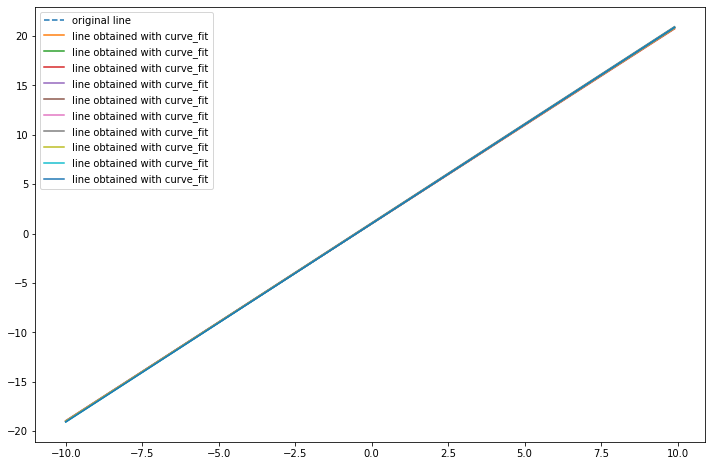

In [35]:
%%time
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(x2, y2, '--', label = 'original line')

with cf.ProcessPoolExecutor(max_workers=workers) as e:
    future_to_url = {e.submit(lin_reg, *[x2, yi]): yi for yi in yn2}
    for future in cf.as_completed(future_to_url):
        yi = future_to_url[future]
        try:
            data = future.result()
        except Exception as exc:
            print('Exception generated: %s' % (exc))
        else:
            plt.plot(x, data, label = 'line obtained with curve_fit')
plt.legend()


Wall time: 69.8 ms


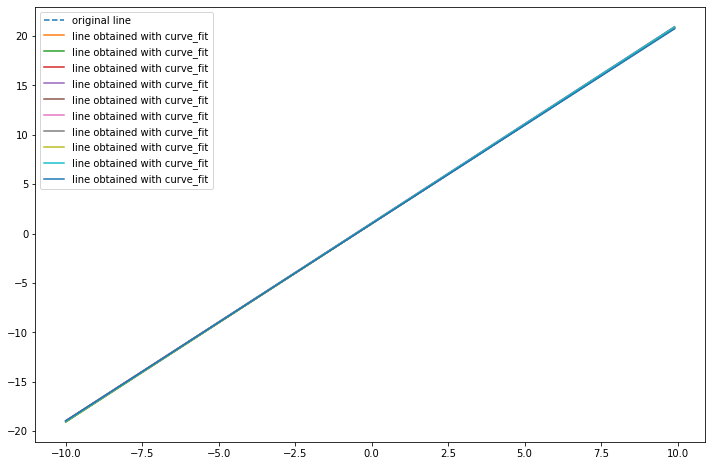

In [36]:
%%time
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(x2, y2, '--', label = 'original line')

with cf.ThreadPoolExecutor(max_workers=workers) as e:
    future_to_url = {e.submit(lin_reg, *[x2, yi]): yi for yi in yn2}
    for future in cf.as_completed(future_to_url):
        yi = future_to_url[future]
        try:
            data = future.result()
        except Exception as exc:
            print('Exception generated: %s' % (exc))
        else:
            plt.plot(x, data, label = 'line obtained with curve_fit')
plt.legend()

## Working in Google Colab 


In some cases, Multithreading is faster than Multiprocessing, even for heavy CPU tasks. 

8. To Do: Why is this happening while working (usually) in Google Colab?

Solution:

8. To Do: Why is this happening while working (usually) in Google Colab?

Multithreading is considerably much more efficient at any task due to the CPU of Google Colab (2 cores).